### Part A

In [75]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [60]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as graph
import seaborn as sns


In [2]:
# Read the Train data file
train= pd.read_csv('CE802_P2_Data.csv')
train.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,NaN,True


In [3]:
# Make sure you work on a copy
train_data = train.iloc[:,:-1].copy()
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,24.44400,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,NaN
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,50.59500,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,NaN
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,38.82552,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,NaN
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,39.59310,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,NaN
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,39.95820,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,NaN


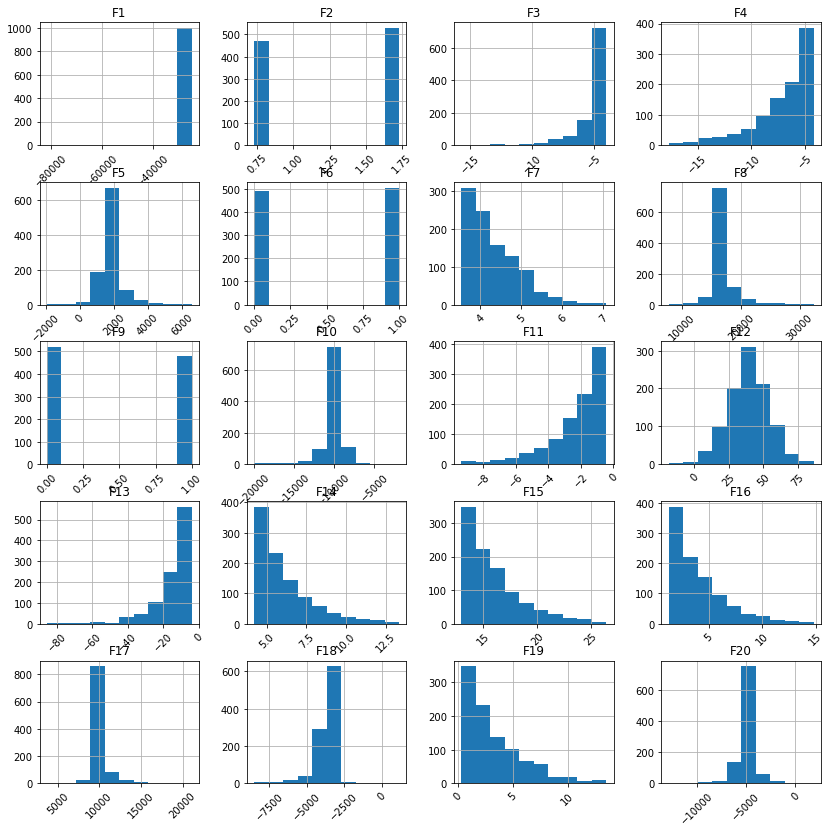

In [24]:
ds = train.drop(['F21','Class'], axis=1)

ds.hist(figsize=(14,14), xrot=45)
graph.show()

In [32]:
train_data.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
dtype: int64

In [33]:
print(train_data['F21'].mean())

-10.183519999999977


In [34]:
train_data['F21'].fillna((train_data['F21'].mean()), inplace=True)


In [35]:
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,24.44400,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,-10.18352
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,50.59500,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,-10.18352
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,38.82552,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,-10.18352
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,39.59310,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,-10.18352
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,39.95820,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,-10.18352


In [36]:
train_data.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
dtype: int64

In [37]:
y_train=train['Class']
train_X, test_X, train_Y, test_Y = train_test_split(train_data, y_train, test_size=0.25,random_state=1)

In [38]:
classifier = DecisionTreeClassifier()
classifier.fit(train_X,train_Y)
predicted= classifier.predict(test_X)
print(predicted)
print('Accuracy:')
print(metrics.accuracy_score(test_Y,predicted))

[False False  True False  True  True  True  True  True  True False  True
  True  True False False False False False  True False  True False  True
  True  True False  True False False  True  True False False  True  True
  True False False False False  True False  True False False  True False
  True  True  True  True False  True False  True False  True  True  True
 False  True False False False False  True  True  True  True  True  True
 False  True  True  True  True  True False False False False  True  True
 False  True False False  True False  True False  True False False False
  True False  True  True False False  True  True False  True  True  True
  True  True  True False False  True  True False False  True  True  True
  True  True False  True False False False  True  True False False False
  True  True  True False  True  True False  True False  True False  True
 False  True  True False False  True False  True False False False False
 False  True  True False  True False  True  True Fa

In [39]:
svc=SVC() #Default hyperparameters
svc.fit(train_X,train_Y)
predicted=svc.predict(test_X)
print(predicted)
print('Accuracy:')
print(metrics.accuracy_score(test_Y,predicted))


[False False  True False  True  True  True  True  True  True False  True
  True False False False False False False False False  True False False
 False False False False False False False  True  True False False  True
 False  True  True False False  True False  True  True False False False
 False False  True False False False False False  True  True False  True
 False  True  True False False False  True False False False False False
 False False False  True False False False False False False  True False
 False  True False False  True False  True False False False False False
 False False  True  True False False False  True False  True False  True
  True  True False False False  True  True False False False  True  True
  True False False False False False  True False  True False  True False
  True False False False False False  True False False  True False  True
 False False False  True  True False False False False False False False
 False False False False False False False  True  T

In [40]:
NaiveBias = GaussianNB()
NaiveBias.fit(train_X,train_Y) #Train the model using training set.
#Predict Output
predicted= NaiveBias.predict(test_X) 
print(predicted)
print('Accuracy:')
print(metrics.accuracy_score(test_Y,predicted))

[False  True  True False  True  True False  True  True  True  True  True
  True False False  True False  True  True  True False  True  True False
 False  True False False False False False  True False False  True  True
  True  True  True False False  True  True  True  True False  True False
 False  True False  True  True False False False False  True False  True
 False  True  True  True  True False  True False  True False False False
 False False  True  True  True  True False False False False  True  True
  True  True False False  True False  True  True  True False False False
  True False  True  True False False  True  True False  True False  True
  True  True False False  True  True  True  True False  True  True  True
  True False False False False False False False False False  True False
  True  True  True False  True False False  True False  True  True  True
  True  True  True  True  True  True False  True False  True False  True
 False False  True False  True False  True  True  T

In [41]:
### PART_B

In [42]:
# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')


In [43]:
# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
test_data.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-27811.790,0.73,-4.043706,-4.6095,2063.450,0,4.0293,16628.180,0,-9497.42,...,17.856,-5.2930,5.22260,17.5350,3.0828,9640.918,-3691.77,3.0300,-5758.42,-11.57
1,-28721.370,0.73,-7.532000,-5.6700,992.050,1,4.4711,15953.180,1,-12595.82,...,12.171,-3.8826,4.23164,17.8560,2.0421,9764.120,-3574.65,5.2620,-5753.22,-10.29
2,-28706.015,0.73,-6.698000,-7.3560,2115.550,1,3.8388,16308.040,1,-9969.02,...,55.230,-13.8500,4.75960,16.6260,3.9639,9572.620,-3776.73,2.6883,-5453.02,NaN
3,-28671.690,0.73,-4.100420,-10.9410,1582.684,1,3.8790,17506.780,1,-10968.62,...,59.256,-14.8500,6.20000,13.7511,2.2122,9608.240,-4217.55,1.5393,-5244.50,-9.29
4,-28720.720,1.73,-4.506200,-6.2670,1949.250,0,5.0470,16155.058,0,-5815.82,...,35.091,-17.9400,5.38760,14.4630,1.5048,9622.040,-3560.13,1.4982,-4460.22,-8.97


In [44]:
print(test_data['F21'].mean())

-10.196379999999998


In [45]:
test_data['F21'].fillna((test_data['F21'].mean()), inplace=True)


In [46]:
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-27811.790,0.73,-4.043706,-4.6095,2063.450,0,4.0293,16628.180,0,-9497.42,...,17.856,-5.2930,5.22260,17.5350,3.0828,9640.918,-3691.77,3.0300,-5758.42,-11.57000
1,-28721.370,0.73,-7.532000,-5.6700,992.050,1,4.4711,15953.180,1,-12595.82,...,12.171,-3.8826,4.23164,17.8560,2.0421,9764.120,-3574.65,5.2620,-5753.22,-10.29000
2,-28706.015,0.73,-6.698000,-7.3560,2115.550,1,3.8388,16308.040,1,-9969.02,...,55.230,-13.8500,4.75960,16.6260,3.9639,9572.620,-3776.73,2.6883,-5453.02,-10.19638
3,-28671.690,0.73,-4.100420,-10.9410,1582.684,1,3.8790,17506.780,1,-10968.62,...,59.256,-14.8500,6.20000,13.7511,2.2122,9608.240,-4217.55,1.5393,-5244.50,-9.29000
4,-28720.720,1.73,-4.506200,-6.2670,1949.250,0,5.0470,16155.058,0,-5815.82,...,35.091,-17.9400,5.38760,14.4630,1.5048,9622.040,-3560.13,1.4982,-4460.22,-8.97000


In [47]:
predicted= classifier.predict(test_data)
print(predicted)

[ True False False False False False  True False  True  True False False
 False False False False  True  True  True  True False  True  True False
 False False  True  True False False  True False False False False  True
 False False False False  True False False False  True False  True False
  True  True False  True False False  True False False False False False
  True  True False False False  True False False False False False  True
 False  True  True  True  True  True  True  True  True False False False
 False False  True False False False False  True  True False False  True
  True False False False  True  True  True  True False  True  True False
 False False  True False  True False  True False False False False  True
  True  True  True False  True  True False False  True False  True  True
 False  True False  True  True False False False False False  True  True
 False  True False  True  True  True False False  True  True  True  True
  True  True False  True False  True  True  True Fa

In [48]:
print(metrics.accuracy_score(y_train,predicted))

0.493


In [49]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET


# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted
test_df.head()

# Save to the destination file


# IMPORTANT!! Make sure only the last column has changed


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-27811.790,0.73,-4.043706,-4.6095,2063.450,0,4.0293,16628.180,0,-9497.42,...,-5.2930,5.22260,17.5350,3.0828,9640.918,-3691.77,3.0300,-5758.42,-11.57,True
1,-28721.370,0.73,-7.532000,-5.6700,992.050,1,4.4711,15953.180,1,-12595.82,...,-3.8826,4.23164,17.8560,2.0421,9764.120,-3574.65,5.2620,-5753.22,-10.29,False
2,-28706.015,0.73,-6.698000,-7.3560,2115.550,1,3.8388,16308.040,1,-9969.02,...,-13.8500,4.75960,16.6260,3.9639,9572.620,-3776.73,2.6883,-5453.02,NaN,False
3,-28671.690,0.73,-4.100420,-10.9410,1582.684,1,3.8790,17506.780,1,-10968.62,...,-14.8500,6.20000,13.7511,2.2122,9608.240,-4217.55,1.5393,-5244.50,-9.29,False
4,-28720.720,1.73,-4.506200,-6.2670,1949.250,0,5.0470,16155.058,0,-5815.82,...,-17.9400,5.38760,14.4630,1.5048,9622.040,-3560.13,1.4982,-4460.22,-8.97,False


In [50]:
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

In [51]:
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])

In [64]:
filterDataset = test_df[['F10', 'F20','Class']].copy()
filterDataset.head()

,F10,F20,Class
0,-9497.42,-5758.42,True
1,-12595.82,-5753.22,False
2,-9969.02,-5453.02,False
3,-10968.62,-5244.50,False
4,-5815.82,-4460.22,False


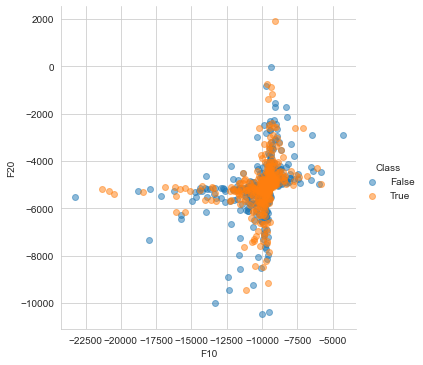

In [66]:

sns.lmplot(x='F10', y='F20', hue='Class', data=filterDataset, fit_reg=False, scatter_kws={'alpha':0.5});

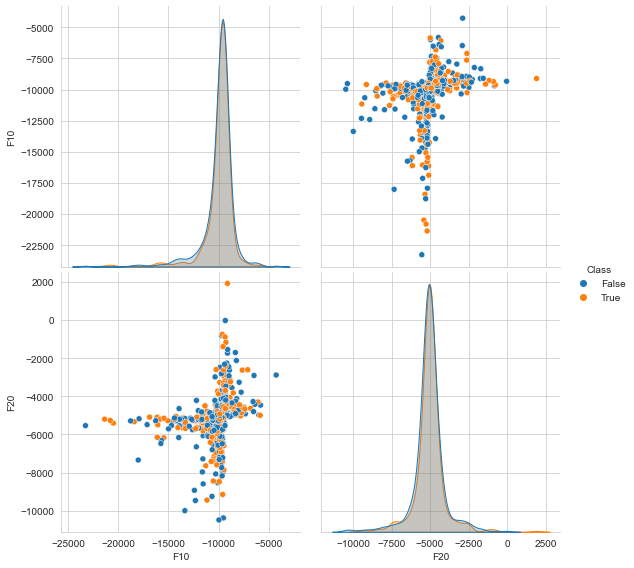

In [68]:
sns.set_style('whitegrid');
sns.pairplot(filterDataset, hue ='Class', height = 4)
graph.show()